# Portrait plot using Matplotlib 

- Generate a static image of Portrait plot (with or without triangles) using Matplotlib.
- Author: Jiwoo Lee (2021-07)

## 1. Input (Dummy Array)

Input data is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

In [1]:
import numpy as np

# Test dummy array -- fill random numbers for each array
data1 = np.random.randn(8, 7)
data2 = np.random.randn(8, 7)
data3 = np.random.randn(8, 7)
data4 = np.random.randn(8, 7)

"""
# Test dummy array -- fill same numbers for each array
data1 = np.full((8, 7), -2)
data2 = np.full((8, 7), -1)
data3 = np.full((8, 7), 1)
data4 = np.full((8, 7), 2)
"""

data_all = np.stack([data1, data2, data3, data4])
xaxis_labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7']
yaxis_labels = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8']

xaxis_labels = ['Metric '+x for x in xaxis_labels]
yaxis_labels = ['Model '+y for y in yaxis_labels]

## 2. Matplotlib Functions

In [2]:
from portrait_plot import portrait_plot

<p id="parameters"></p>

Parameters
----------
- `data`: 2d numpy array, a list of 2d numpy arrays, or a 3d numpy array (i.e. stacked 2d numpy arrays)
- `xaxis_labels`: list of strings, labels for xaixs. Number of list element must consistent to x-axis, or 0 (empty list) to turn off xaxis tick labels
- `yaxis_labels`: list of strings, labels for yaxis. Number of list element must consistent to y-axis, or 0 (empty list) to turn off yaxis tick labels
- `fig`: `matplotlib.figure` instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `ax`: `matplotlib.axes.Axes` instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `annotate`: bool, default=False, add annotating text if true, but work only for heatmap style map (i.e., no triangles)
- `annotate_data`: 2d numpy array, default=None. If None, the image's data is used.  Optional. 
- `annotate_fontsize`: number (int/float), default=15. Font size for annotation
- `figsize`: tuple of two numbers, default=(12, 10), figure size
- `vrange`: tuple of two numbers, default=(-3, 3), range of value for colorbar
- `xaxis_fontsize`: number, default=15, font size for xaxis tick labels
- `yaxis_fontsize`: number, default=15, font size for yaxis tick labels
- `cmap`: string, default="RdBu_r", name of matplotlib colormap
- `cbarlabel`: string, default=None, label for colorbar
- `cbar_label_fontsize`: number, default=15, font size for colorbar labels
- `cbar_tick_fontsize`: number, default=12, font size for colorbar tick labels
- `invert_yaxis`: bool, default=True, place y=0 at top on the plot
- `debug`: bool, default=False, if true print more message when running that help debugging

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis
- `cbar`: matplotlib component for colorbar

## 3. Usage example

## 3.1 Portrait Plot with 4 Triangles

- data order is clockwise from top: top, right, bottom, left

(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.colorbar.Colorbar at 0x151718490>)

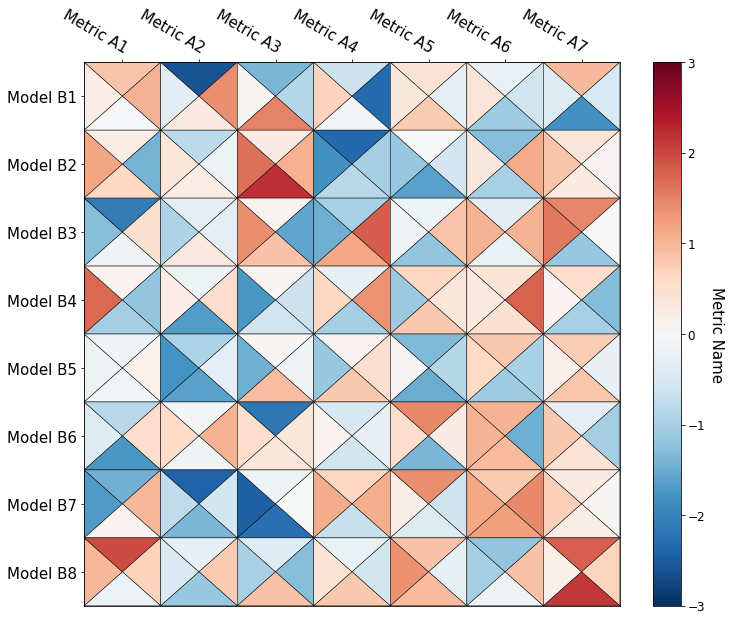

In [3]:
portrait_plot(data_all,  # or [data1, data2, data3, data4] (top, right, bottom, left: clockwise from top)
              xaxis_labels=xaxis_labels, 
              yaxis_labels=yaxis_labels, 
              cbarlabel='Metric Name')

## 3.2 Portrait Plot with 2 Triangles

(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.colorbar.Colorbar at 0x151890310>)

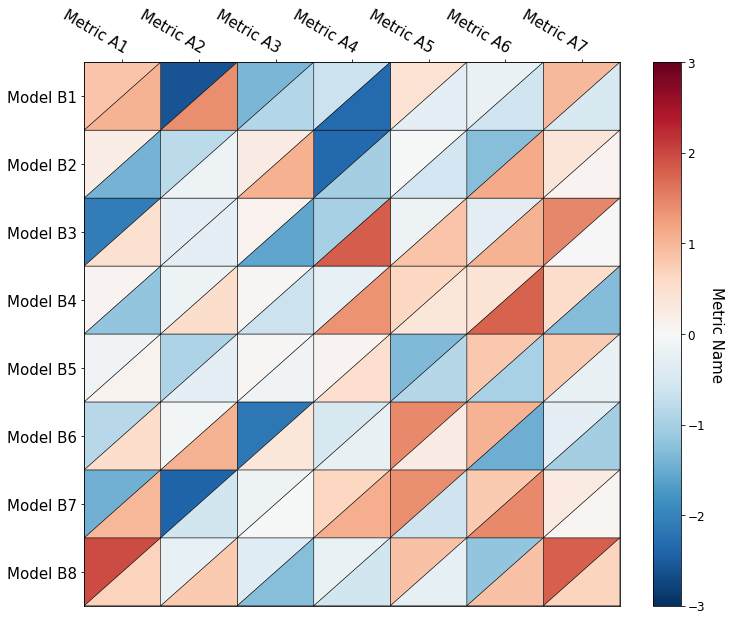

In [4]:
portrait_plot([data1, data2],  # or np.stack([data1, data2]) for (upper, lower)
              xaxis_labels=xaxis_labels, 
              yaxis_labels=yaxis_labels, 
              cbarlabel='Metric Name')

## 3.3 Portrait Plot without Triangles (Heatmap-style)

(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.colorbar.Colorbar at 0x151928df0>)

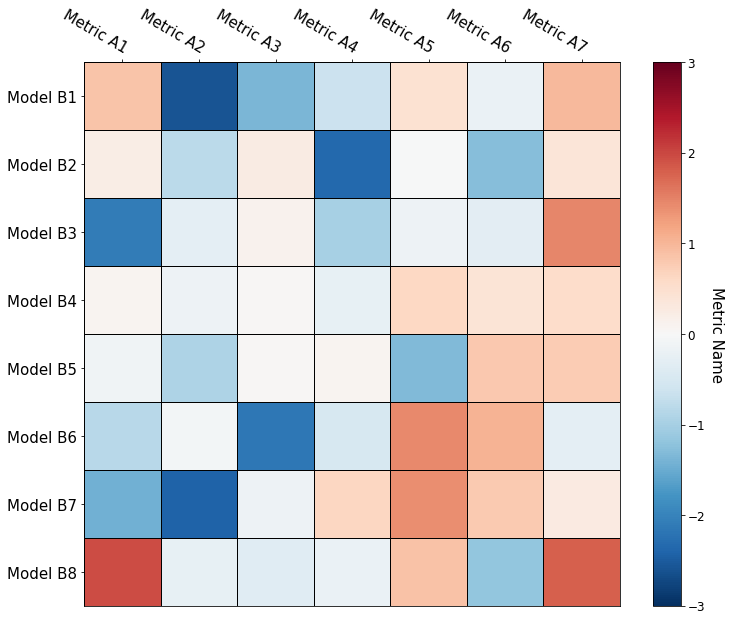

In [5]:
portrait_plot(data1, # or [data1]
              xaxis_labels=xaxis_labels, 
              yaxis_labels=yaxis_labels, 
              cbarlabel='Metric Name')

### 3.3.2 Annotated Heatmap

Showing numbers in each box is only avaiable with the heatmap-style (no triangle) portrait plot. By default, in each box value corresponding to color is shown.

(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.colorbar.Colorbar at 0x1519e48e0>)

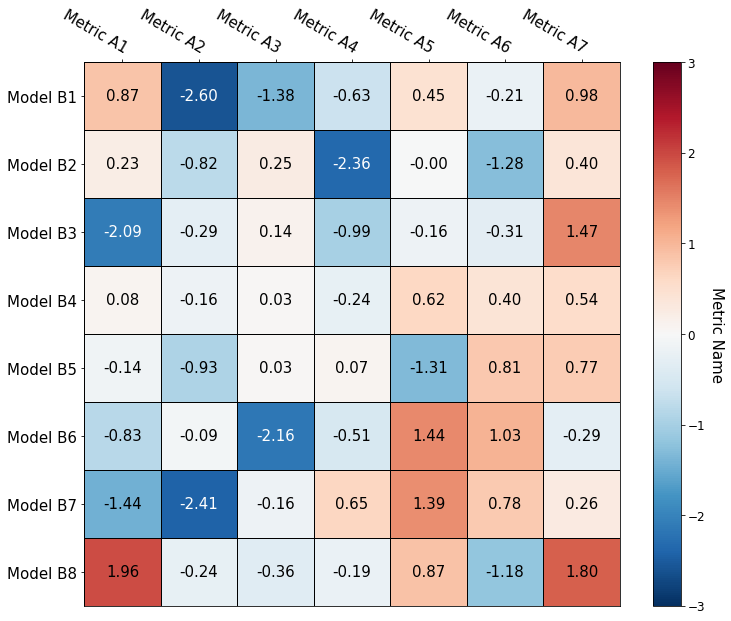

In [6]:
portrait_plot(data1, 
              xaxis_labels=xaxis_labels, 
              yaxis_labels=yaxis_labels, 
              annotate=True, 
              cbarlabel='Metric Name')

### 3.3.3 Annotated Heatmap (use alternative numbers)

If you want to use different number than colored (e.g., usually portrait plot uses normalized numbers per metric for colors but you want to show actual metric value that is not normalized), you can assign another array as `annotate_data`. Note that the 2d array given as the `annotate_data` should have the same size as the given 2d array for plotting.

(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.colorbar.Colorbar at 0x151b19790>)

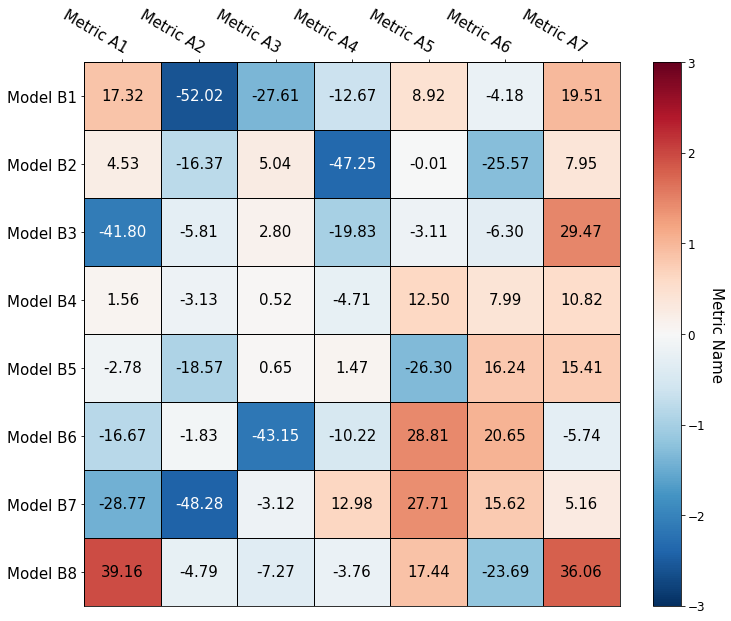

In [7]:
annotate_data = data1 * 20

portrait_plot(data1,
              annotate_data = annotate_data,
              xaxis_labels=xaxis_labels, 
              yaxis_labels=yaxis_labels, 
              annotate=True, 
              cbarlabel='Metric Name')

### 3.3.4 Further customizations

- Use <a href="#parameters">input parameters</a> of `portrait_plot` function for customizing the plot. 
- In addition, by returning [`fig`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) (figure), [`ax`](https://matplotlib.org/stable/api/axes_api.html) (axis), and [`cbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) (colorbar), which are [`matplotlib`](https://matplotlib.org/) components, enables further plot customizations.

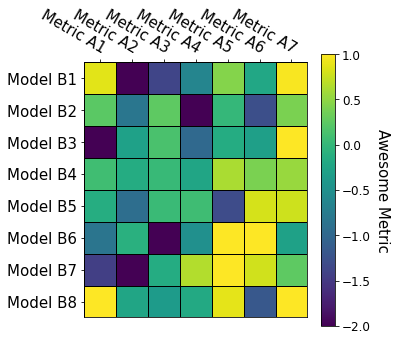

In [8]:
fig, ax, cbar = portrait_plot(data1, 
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbarlabel='Awesome Metric',
                              figsize=(5, 5), 
                              vrange=(-2, 1), cmap="viridis", box_as_square=True)

- Further customizations are avaialble by using returned [`fig`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) (figure), [`ax`](https://matplotlib.org/stable/api/axes_api.html) (axis), and [`cbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) (colorbar), which are [`matplotlib`](https://matplotlib.org/) components.

<ipython-input-9-882a517d021e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['a', 'b', 'c', 'd'])


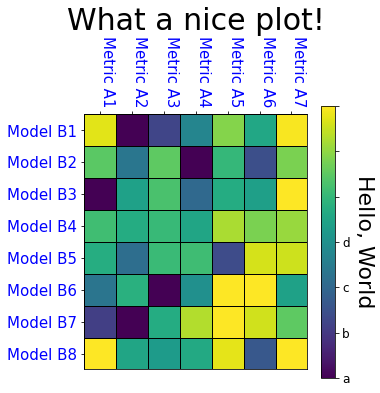

In [9]:
ax.set_title('What a nice plot!', fontsize=30)
ax.set_xticklabels(xaxis_labels, rotation=-90)
ax.tick_params(labelcolor='blue')
cbar.ax.set_ylabel("Hello, World", rotation=-90, va="bottom", fontsize=22)
cbar.ax.set_yticklabels(['a', 'b', 'c', 'd']) 
fig

### 3.3.5 Multi-panel plot

- You can make also a multi-panel plot.

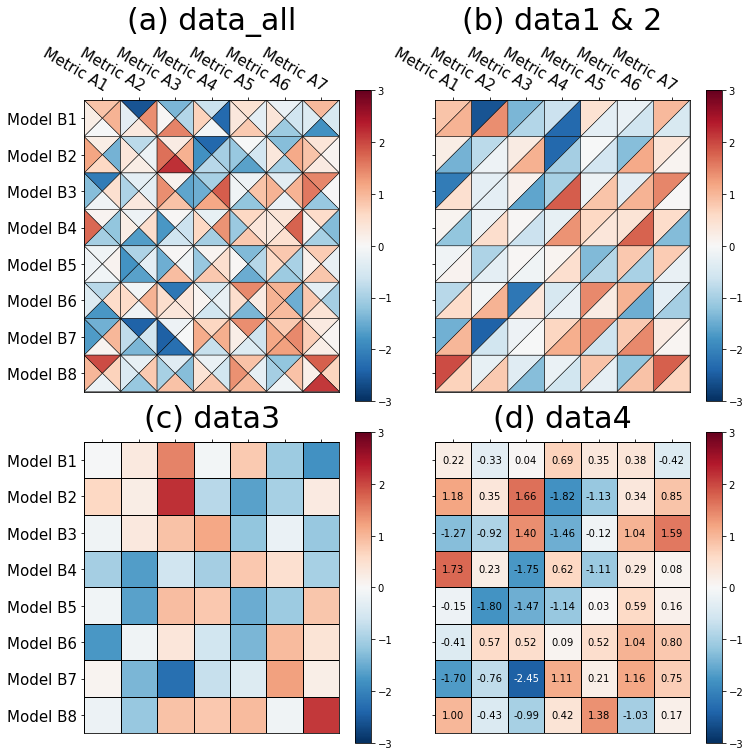

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

portrait_plot([data1, data2, data3, data4], 
              fig=fig, ax=ax[0,0],
              xaxis_labels=xaxis_labels, 
              yaxis_labels=yaxis_labels, 
              vrange=(-3, 3), box_as_square=True)
ax[0,0].set_title('(a) data_all', fontsize=30, pad=15)

portrait_plot([data1, data2], 
              fig=fig, ax=ax[0,1],
              xaxis_labels=xaxis_labels, 
              yaxis_labels=[], 
              vrange=(-3, 3), box_as_square=True)
ax[0,1].set_title('(b) data1 & 2', fontsize=30, pad=15)

portrait_plot(data3, 
              fig=fig, ax=ax[1,0],
              xaxis_labels=[], 
              yaxis_labels=yaxis_labels, 
              vrange=(-3, 3), box_as_square=True)
ax[1,0].set_title('(c) data3', fontsize=30, pad=15)

portrait_plot(data4,
              annotate=True,
              annotate_fontsize=10,
              fig=fig, ax=ax[1,1],
              xaxis_labels=[], 
              yaxis_labels=[], 
              vrange=(-3, 3), box_as_square=True)
ax[1,1].set_title('(d) data4', fontsize=30, pad=15)

plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()